In [44]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import spacy
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

In [96]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_posCorpora.plk','rb') as f:
    posCount=pickle.load(f)    
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  
    
for k in totalCount.keys():
    total=totalCount[k]
    neg=negCount[k]
    pos=negCount[k]
    negCount[k]=neg/total
    posCount[k]=pos/total
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
with open('./Master_vocab.pkl','rb') as f:
    vocab=pickle.load(f)
tok2id=vocab['tok2id']
id2tok=vocab['id2tok']
endid=tok2id['e0s']
docs=nlp.pipe(test1.loc[negidx]['text'])
negtextFreq = [ [ negCount[token.text] for token in doc if(token.is_stop==False and token.is_punct==False)] for doc in docs ] 
for i,r in enumerate(negtextFreq):
    if len(r)<175:
        negtextFreq[i]=(r+([negCount['e0s']]*(175-len(r))))
    else:
        negtextFreq[i]=negtextid[i][:175]
docs=nlp.pipe(test1.loc[posidx]['text'])
postextFreq = [ [ posCount[token.text] for token in doc if(token.is_stop==False and token.is_punct==False)] for doc in docs ] 
for i,r in enumerate(postextFreq):
    if len(r)<175:
        postextFreq[i]=(r+([posCount['e0s']]*(175-len(r))))
    else:
        postextFreq[i]=postextid[i][:175]

negtextFreq=np.array(negtextFreq)
postextFreq=np.array(postextFreq)
path='/home/dick/RunpodData2/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 HPC Curl RandMerge  
 1 HPC Curl BaseCase   
 2 Curl skipCCONJ R1   
 3 Curl RandMerge min2Max3
 4 HPC Curl MergeADJ   
 5 BaseCase 256dim R1  
 6 Curl RandMerge R1   
 7 Curl BaseCase R1    
 8 RandMerge 256dim min2max2
 9 Curl MergePROPN R1  


In [46]:
curdataList = glob.glob(f'{path}{run[2]}/val_curldata_*.plk')
divdataList = glob.glob(f'{path}{run[2]}/val_divdata_*.plk')
curldata={}
divdata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        tmp=pickle.load(f)
        i=list(tmp.keys())[0]
        curldata[i]=tmp[i]
for file in divdataList:
    with open(f'{file}','rb') as f:
        tmp=pickle.load(f)
        i=list(tmp.keys())[0]
        divdata[i]=tmp[i]
print(sorted(list(curldata.keys())))negtextid

[204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,

In [50]:
epoch=513
keys=list(curldata[epoch]['forward'].keys())
print(keys)

[0, 25, 50, 75, 100, 125, 150]


In [51]:
#samplesize=min(len(negidx),len(posidx))
samplesize=200
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
epochN_in=curldata[epoch][direction][0][nsmpidx,:25,:]
epochN_curl=curldata[epoch][direction][0][nsmpidx,25:,:]
epochP_in=curldata[epoch][direction][0][psmpidx,:25,:]
epochP_curl=curldata[epoch][direction][0][psmpidx,25:,:]

epochN_div=divdata[epoch][direction][0][nsmpidx,25:,:]
epochP_div=divdata[epoch][direction][0][psmpidx,25:,:]

for k in range(1,len(keys)):
    epochN_in = np.hstack((epochN_in,curldata[epoch][direction][keys[k]][nsmpidx,:25,:]))
    epochN_curl = np.hstack((epochN_curl,curldata[epoch][direction][keys[k]][nsmpidx,25:,:]))
    epochP_in = np.hstack((epochP_in,curldata[epoch][direction][keys[k]][psmpidx,:25,:]))
    epochP_curl = np.hstack((epochP_curl,curldata[epoch][direction][keys[k]][psmpidx,25:,:]))
    epochN_div = np.hstack((epochN_div,divdata[epoch][direction][keys[k]][nsmpidx,25:,:]))
    epochP_div = np.hstack((epochP_div,divdata[epoch][direction][keys[k]][psmpidx,25:,:]))

200


length=175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
fig = plt.figure(dpi=600)
curlax = fig.add_subplot(projection='3d')
ln=curlax.quiver(epochN_in[50:100,0:1,0], epochN_in[50:100,0:1,1], epochN_in[50:100,0:1,2],
              epochN_curl[50:100,0:1,0] , epochN_curl[50:100,0:1,1], epochN_curl[50:100,0:1,2] ,
              length=0.3,color=nco[0], normalize=True)
def init():
    return ln
def update(i):
    global nco
    i=int(i)
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    ln=curlax.quiver(epochN_in[50:100,i:i+1,0], epochN_in[50:100,i:i+1,1], epochN_in[50:100,i:i+1,2],
              epochN_curl[50:100,i:i+1,0] , epochN_curl[50:100,i:i+1,1], epochN_curl[50:100,i:i+1,2] ,
              length=0.1, normalize=True,color=cmap)
    return ln

ani = FuncAnimation(fig, update, frames=length, init_func=init, blit=True, interval=100)
HTML(ani.to_html5_video())

In [26]:
start,stop=0,175
negcolormap = cm.viridis
colors=np.arange(175//25)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
curlax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop,25):
    #p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    #p=np.where(p>99,99,p)
    #cmap=nco[p.astype(int)]
    curlax.quiver(epochN_in[:,i:i+25,0], epochN_in[:,i:i+25,1], epochN_in[:,i:i+25,2],
                  epochN_curl[:,i:i+25,0] , epochN_curl[:,i:i+25,1], epochN_curl[:,i:i+25,2] ,
                  length=0.1,colors=nco[i//25],normalize=True)
    curlax.set_xlabel('LSTM output dim x')
    curlax.set_ylabel('LSTM output dim y')
    curlax.set_zlabel('LSTM output dim z')
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
cbar=plt.colorbar(sm,ax=curlax)
cbar.set_label('Block Sequence (25tokens/block)')
curlfig.set_label(f"Epoch {epoch}: Accy 0.3, LSTM output datapoint vs Block Sequence (Validation Set negative {samplesize} samples)")
plt.show()

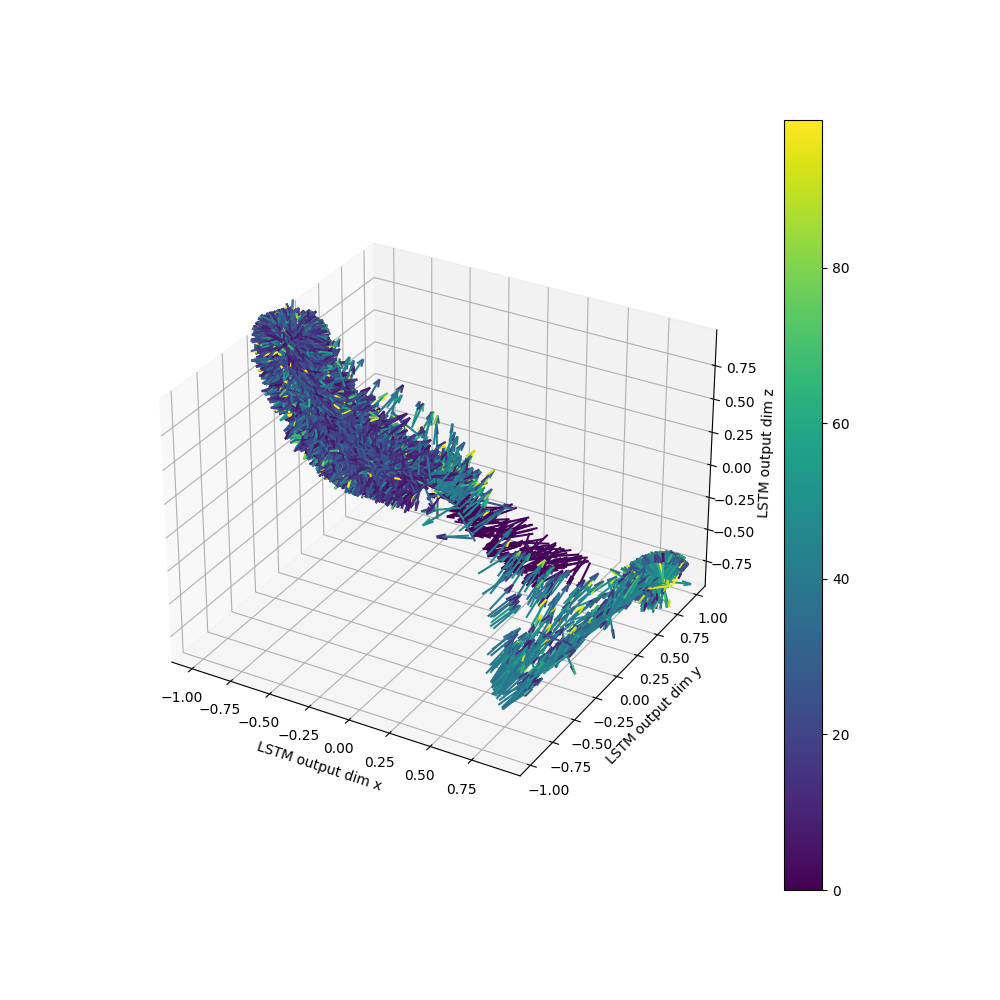

In [53]:
start,stop=0,175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
curlax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop):
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    curlax.quiver(epochN_in[:,i:i+1,0], epochN_in[:,i:i+1,1], epochN_in[:,i:i+1,2],
                  epochN_curl[:,i:i+1,0] , epochN_curl[:,i:i+1,1], epochN_curl[:,i:i+1,2] ,
                  length=0.2,colors=cmap,normalize=True)
    curlax.set_xlabel('LSTM output dim x')
    curlax.set_ylabel('LSTM output dim y')
    curlax.set_zlabel('LSTM output dim z')
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
cbar=plt.colorbar(sm,ax=curlax)
#cbar.set_label('Relative Position')
#curlfig.set_label(f"Epoch {epoch}: Accy 0.71, LSTM output datapoint vs Relative Position (Validation Set negative {samplesize} samples)")
plt.show()

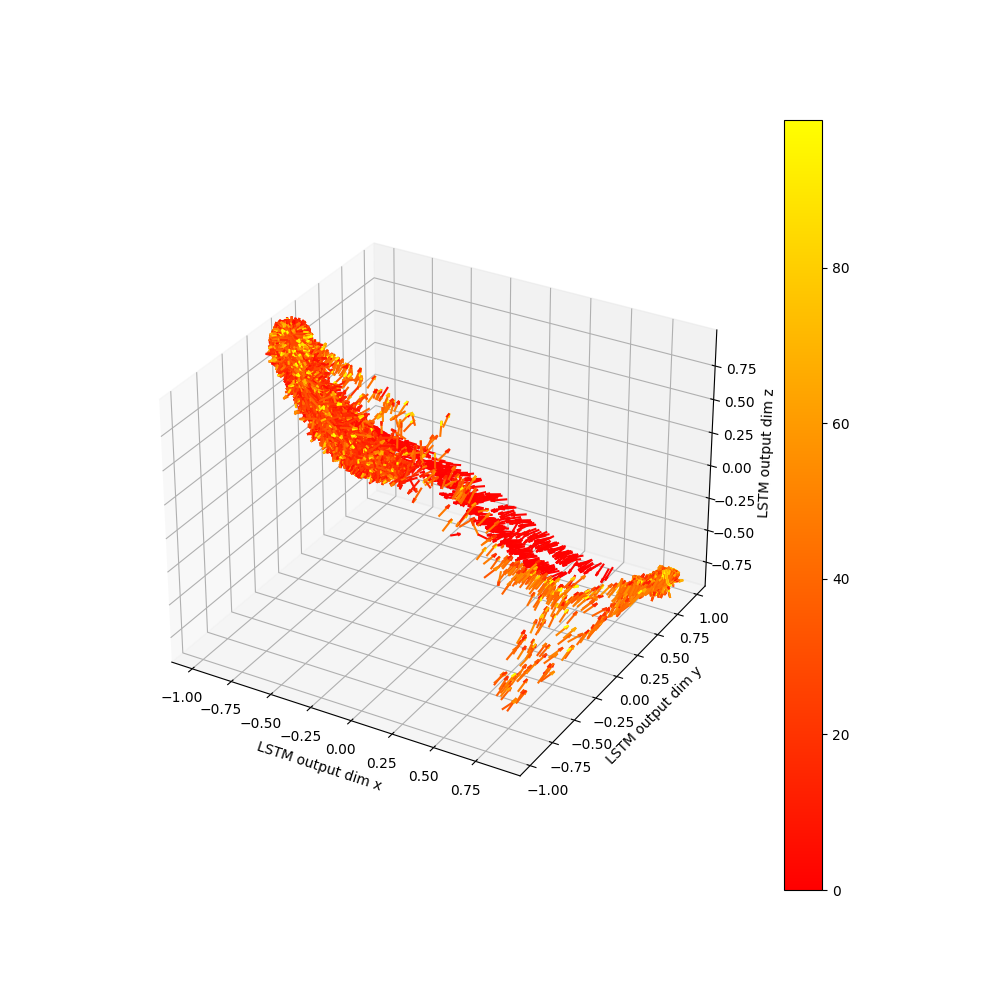

In [54]:
start,stop=0,175
poscolormap = cm.autumn
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
pco=poscolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
for i in range(start,stop):
    p=np.ceil(i/test1.loc[psmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=pco[p.astype(int)]
    curlax.quiver(epochP_in[:,i:i+1,0], epochP_in[:,i:i+1,1], epochP_in[:,i:i+1,2],
                  epochP_curl[:,i:i+1,0] , epochP_curl[:,i:i+1,1], epochP_curl[:,i:i+1,2] ,
                 length=0.1, normalize=True,color=cmap)
    curlax.set_xlabel('LSTM output dim x')
    curlax.set_ylabel('LSTM output dim y')
    curlax.set_zlabel('LSTM output dim z')
sm = plt.cm.ScalarMappable(cmap=cm.autumn, norm=norm)
cbar=plt.colorbar(sm,ax=curlax)
#cbar.set_label('Relative Position')
#curlfig.set_label(f"Epoch {epoch}: Accy 0.71, LSTM output datapoint vs Relative Position (Validation Set positive {samplesize} samples)")
plt.show()

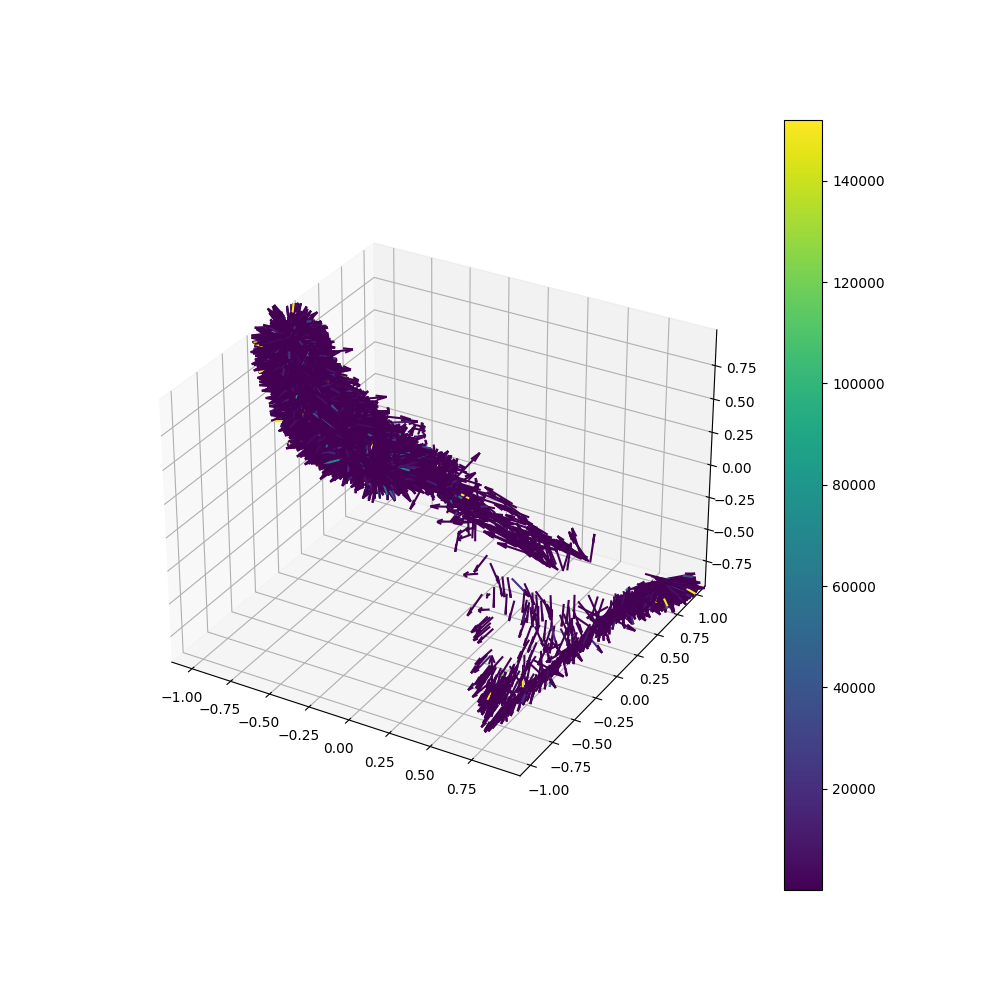

In [100]:
start,stop=0,175
negcolormap = cm.viridis
#colors=np.arange()
norm = Normalize()
norm.autoscale(negtextFreq)
nco=negcolormap(norm(negtextFreq))
plt.close('all')
divfig=plt.figure(figsize=(10,10))
divax=divfig.add_subplot(projection='3d')
divax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop):
    divax.quiver(epochN_in[:,i:i+1,0], epochN_in[:,i:i+1,1], epochN_in[:,i:i+1,2],
                  epochN_div[:,i:i+1,0] , epochN_div[:,i:i+1,1], epochN_div[:,i:i+1,2] ,
                  length=0.2,colors=nco[:,i:i+1],normalize=True)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
plt.colorbar(sm)
plt.show()

In [102]:
negcolormap = cm.viridis
#colors=np.arange()
norm = Normalize()
norm.autoscale(negtextFreq.flatten())
nco=negcolormap(norm(negtextFreq))

In [112]:
np.where(negtextFreq>1)

(array([ 14,  14,  14, ..., 503, 503, 503]),
 array([  5,   6,   7, ..., 172, 173, 174]))

In [113]:
negtextFreq[14]

array([1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       2.16600e+03, 4.17000e+02, 1.00000e+01, 1.10000e+01, 3.23000e+02,
       6.63300e+03, 1.59000e+02, 1.17360e+04, 3.28900e+03, 4.46600e+03,
       7.71000e+02, 3.23000e+02, 1.67350e+04, 1.59000e+02, 2.08000e+02,
       5.34000e+02, 3.73800e+03, 2.45380e+04, 1.13330e+04, 3.31800e+03,
       1.00000e+01, 8.71700e+03, 7.01600e+03, 1.48930e+05, 7.68000e+02,
       3.81600e+03, 5.91000e+02, 1.36000e+02, 3.95400e+03, 7.84200e+03,
       3.68300e+03, 8.74000e+02, 1.46000e+02, 1.59000e+02, 1.05140e+04,
       1.29000e+02, 1.48650e+04, 1.45430e+04, 1.48000e+04, 6.54250e+04,
       7.07500e+03, 1.10210e+04, 7.03000e+02, 8.51000e+02, 1.12500e+03,
       1.59000e+02, 9.54000e+02, 8.52000e+02, 1.61900e+03, 9.09000e+03,
       1.80700e+03, 6.12000e+02, 1.59000e+02, 9.54000e+02, 6.82700e+03,
       3.35000e+02, 1.59000e+02, 3.11300e+03, 1.80360e+04, 2.59360e+04,
       1.59000e+02, 3.04800e+03, 8.02500e+03, 5.84600e+03, 3.304

In [116]:
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_posCorpora.plk','rb') as f:
    posCount=pickle.load(f)    
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  

In [120]:
print(len(totalCount.keys()))
print(len(posCount.keys()))
print(len(negCount.keys()))

34051
34394
34400


In [119]:
for k in totalCount.keys():
    total=totalCount[k]
    neg=negCount[k]
    pos=negCount[k]
    negCount[k]=neg/total
    posCount[k]=pos/total

In [ ]:
negCount